<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**
*by [Alessandro Gonzalez](http://alessandrogonzalez.blogspot.com/)*

---

# Análise dos Dados do Airbnb - *Buenos Aires - Argentina*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Buenos Aires capital da Argentina, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("https://github.com/alessandroxyz/Analisando-Airbnb-Em-Buenos_Aires/raw/main/Airbnb-BuenosAires-Listings.csv",sep=',',on_bad_lines='skip')

## Análise dos Dados


**Dicionário das variáveis**

* `id` - Número identificador do imóvel
* `name` - Nome da propriedade anunciada
* `host_id` - Número identificador do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - Coluna não contém nenhum valor válido
* `neighbourhood` - Nome do bairro
* `latitude` - Coordenada da latitude da propriedade
* `longitude` - Coordenada da longitude da propriedade
* `room_type` - Informa o tipo de quarto/imóvel oferecido na propriedade
* `price` - Preço para alugar o imóvel (ARS - Peso Argentino)
* `minimum_nights` - Quantidade mínima de noites para reserva
* `number_of_reviews` - Quantidade de reviews da propriedade
* `last_review` - Data da último review
* `reviews_per_month` - Quantidade média de reviews por mês
* `calculated_host_listings_count` - Quantidade de imóveis anunciados do mesmo anfitrião
* `availability_365` - Quantidade de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm` - Quantidade de reviews no último mês
* `license` - Código identificador de licença local para a propriedade

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,11508,Condo in Buenos Aires · ★4.81 · 1 bedroom · 1 ...,42762,Candela,NaN,Palermo,-34.581840,-58.424150,Entire home/apt,17339,3,36,2023-05-13,0.27,1,208,8,NaN
1,14222,Rental unit in Palermo/Buenos Aires · ★4.78 · ...,87710233,María,NaN,Palermo,-34.586170,-58.410360,Entire home/apt,7807,7,108,2023-04-20,0.81,6,261,11,NaN
2,15074,Rental unit in Buenos Aires · 1 bedroom · 1 be...,59338,Monica,NaN,Nuñez,-34.538920,-58.465990,Private room,7665,29,0,NaN,NaN,1,0,0,NaN
3,16695,Loft in Buenos Aires · ★4.28 · 1 bedroom · 1 b...,64880,Elbio Mariano,NaN,Monserrat,-34.614390,-58.376110,Entire home/apt,12738,2,46,2019-11-30,0.31,9,147,0,NaN
4,20062,Rental unit in Buenos Aires · ★4.93 · 2 bedroo...,75891,Sergio Damian,NaN,Palermo,-34.581848,-58.441605,Entire home/apt,25660,2,283,2023-06-11,1.77,4,118,31,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [4]:
# identificar o volume de dados do DataFrame
print("-> Total de atributos:")
print(df.shape[1])
print("\n")

print("-> Total de entradas:")
print(df.shape[0])
print("\n")

# verificar as 5 primeiras entradas do dataset
print("-> Tipagem dos atributos:\n")

for col in df.columns:
  print("{0} | {1}".format(col.ljust(30, ' '),df.dtypes[col]) )




-> Total de atributos:
18


-> Total de entradas:
26204


-> Tipagem dos atributos:

id                             | int64
name                           | object
host_id                        | int64
host_name                      | object
neighbourhood_group            | float64
neighbourhood                  | object
latitude                       | float64
longitude                      | float64
room_type                      | object
price                          | int64
minimum_nights                 | int64
number_of_reviews              | int64
last_review                    | object
reviews_per_month              | float64
calculated_host_listings_count | int64
availability_365               | int64
number_of_reviews_ltm          | int64
license                        | object


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [5]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum()*100 / df.shape[0]).sort_values(ascending=False)


neighbourhood_group               100.000000
license                            98.431537
reviews_per_month                  18.867348
last_review                        18.867348
minimum_nights                      0.000000
number_of_reviews_ltm               0.000000
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
id                                  0.000000
name                                0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_name                           0.000000
host_id                             0.000000
price                               0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?**

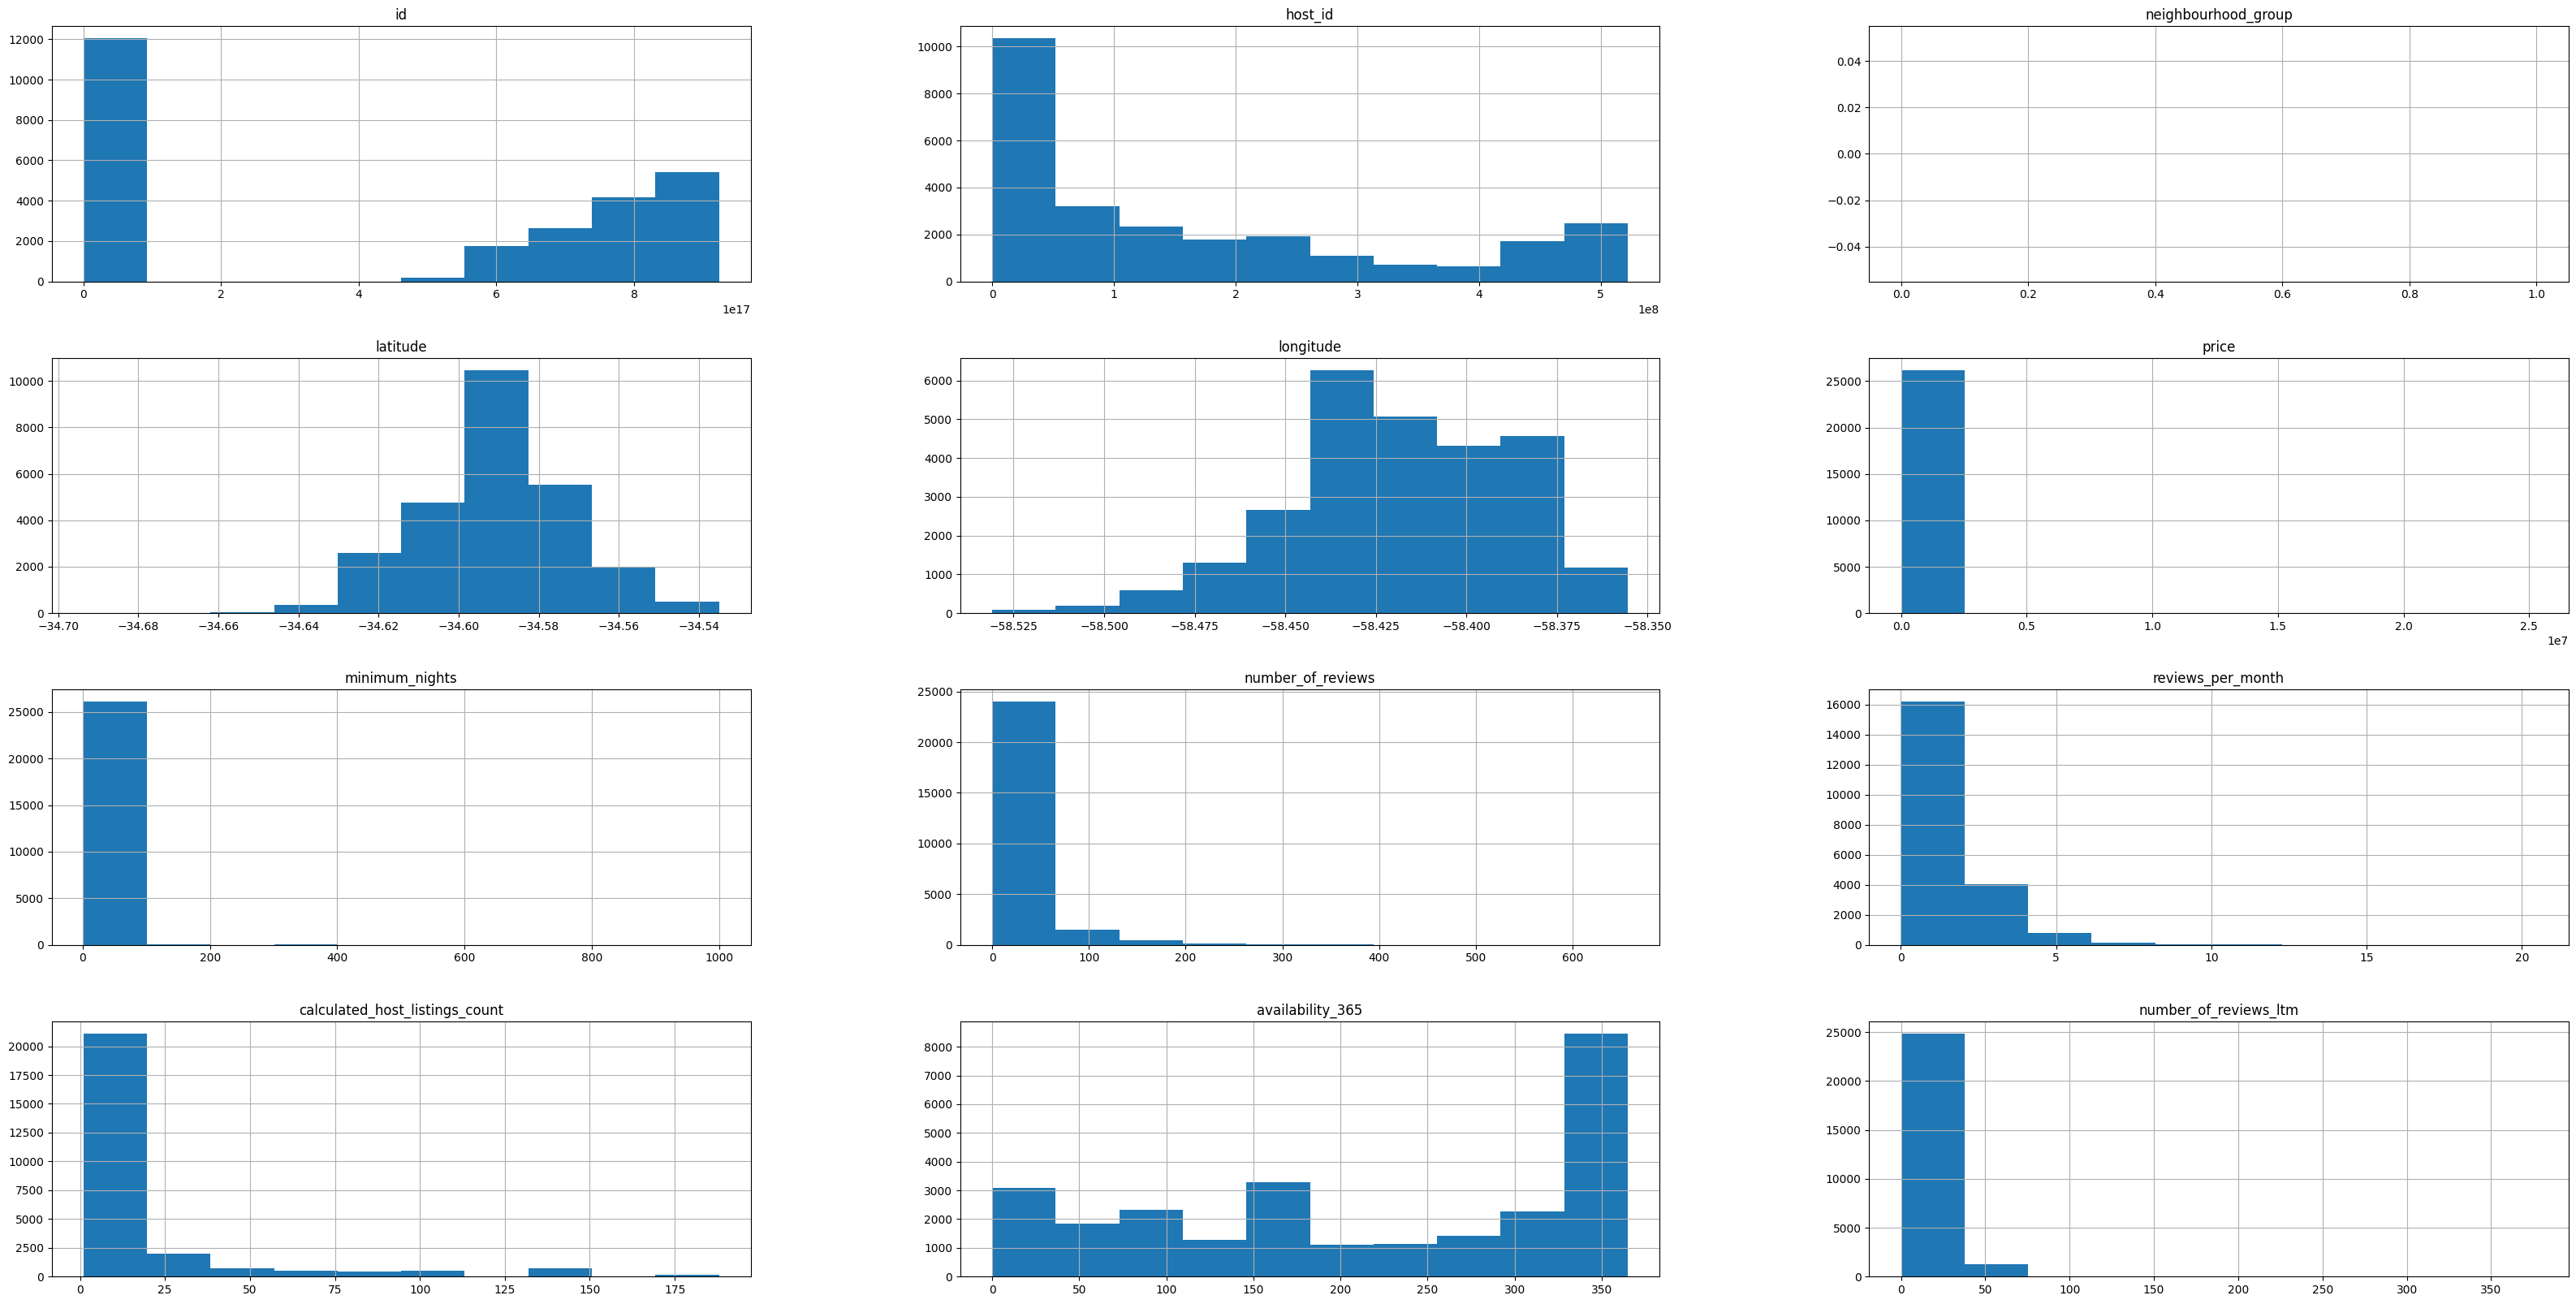

In [6]:
# plotar o histograma das variáveis numéricas
df.hist(figsize=(40,20));


### **Q4. Qual a média dos preços de aluguel?**

#### Estatística dos preços presentes no dataset


In [7]:
#Exibe as informações estatísticas
display(df.price.describe())

count    2.620400e+04
mean     1.752933e+04
std      1.754018e+05
min      1.750000e+02
25%      7.406500e+03
50%      1.019000e+04
75%      1.528600e+04
max      2.529509e+07
Name: price, dtype: float64

In [8]:
# ver a média da coluna `price`
print("-> Média de preços:")
print(df.price.mean())
print("\n")

-> Média de preços:
17529.328690276292




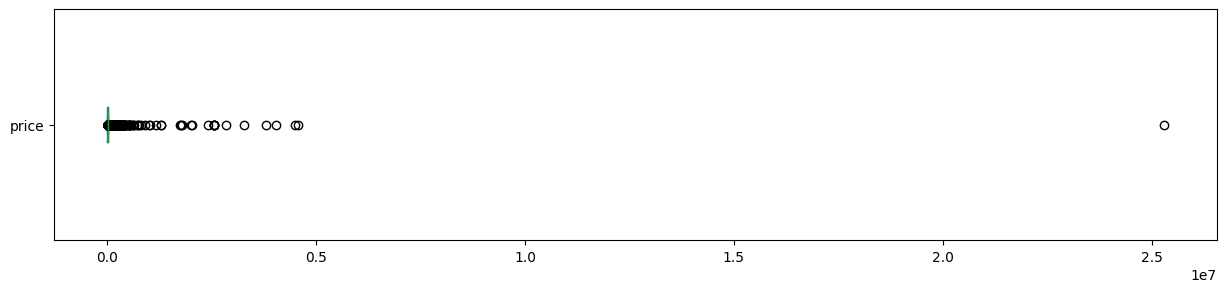

-> Valores acima de 15286:
6365 registros
24.2902%


In [9]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 15286 para price
print("-> Valores acima de 15286:")
print("{} registros".format(len(df[df.price > 15286])))
print("{:.4f}%".format((len(df[df.price > 15286]) / df.shape[0])*100))

### **Q4. Qual a correlação existente entre as variáveis**

In [10]:
dfNew = df.copy()
dfNew.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,11508,Condo in Buenos Aires · ★4.81 · 1 bedroom · 1 ...,42762,Candela,NaN,Palermo,-34.581840,-58.424150,Entire home/apt,17339,3,36,2023-05-13,0.27,1,208,8,NaN
1,14222,Rental unit in Palermo/Buenos Aires · ★4.78 · ...,87710233,María,NaN,Palermo,-34.586170,-58.410360,Entire home/apt,7807,7,108,2023-04-20,0.81,6,261,11,NaN
2,15074,Rental unit in Buenos Aires · 1 bedroom · 1 be...,59338,Monica,NaN,Nuñez,-34.538920,-58.465990,Private room,7665,29,0,NaN,NaN,1,0,0,NaN
3,16695,Loft in Buenos Aires · ★4.28 · 1 bedroom · 1 b...,64880,Elbio Mariano,NaN,Monserrat,-34.614390,-58.376110,Entire home/apt,12738,2,46,2019-11-30,0.31,9,147,0,NaN
4,20062,Rental unit in Buenos Aires · ★4.93 · 2 bedroo...,75891,Sergio Damian,NaN,Palermo,-34.581848,-58.441605,Entire home/apt,25660,2,283,2023-06-11,1.77,4,118,31,NaN


In [11]:
# criar uma matriz de correlação
colList = dfNew[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month','calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(colList)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.009498,-0.011743,-0.015875,-0.002582,-0.009376
minimum_nights,0.009498,1.000000,-0.053051,-0.112147,-0.028380,-0.037871
number_of_reviews,-0.011743,-0.053051,1.000000,0.297938,-0.032066,-0.031198
reviews_per_month,-0.015875,-0.112147,0.297938,1.000000,0.078977,0.062474
calculated_host_listings_count,-0.002582,-0.028380,-0.032066,0.078977,1.000000,0.054624
availability_365,-0.009376,-0.037871,-0.031198,0.062474,0.054624,1.000000


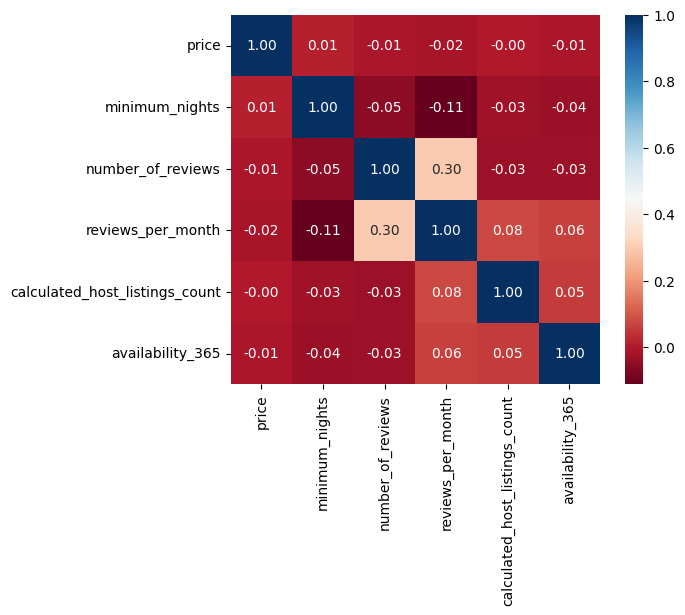

In [12]:
# plotar um heatmap a partir das correlações
sns.heatmap(colList, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);


### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [13]:
# mostrar a quantidade de cada tipo de imóvel disponível
dfNew.room_type.value_counts()

Entire home/apt    23556
Private room        2343
Shared room          206
Hotel room            99
Name: room_type, dtype: int64

In [14]:
# mostrar a porcentagem de cada tipo de imóvel disponível
dfNew.room_type.value_counts()*100 / dfNew.shape[0]

Entire home/apt    89.894673
Private room        8.941383
Shared room         0.786140
Hotel room          0.377805
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [15]:
# ver preços por bairros, na média
dfNew.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Coghlan          287660.755319
Boca              81981.068182
Villa Real        49321.888889
Puerto Madero     30228.752508
Barracas          25588.214634
San Telmo         21102.747532
Caballito         19153.684211
Monserrat         18349.882297
Villa Urquiza     18173.478395
Palermo           18003.435795
Name: price, dtype: float64

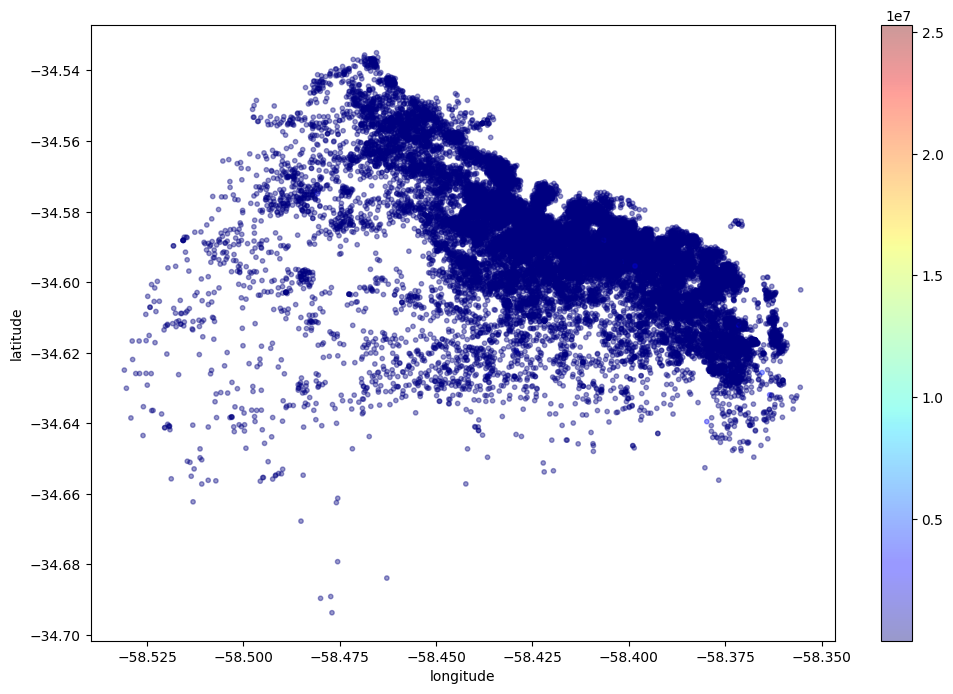

In [26]:
# plotar os imóveis pela latitude-longitude
dfNew.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=dfNew['price'], s=10,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

count    26204.000000
mean         6.300145
std         24.286468
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max       1000.000000
Name: minimum_nights, dtype: float64

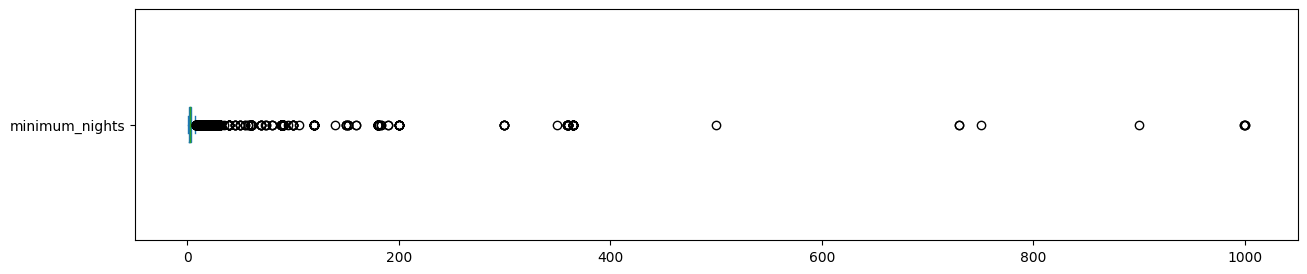

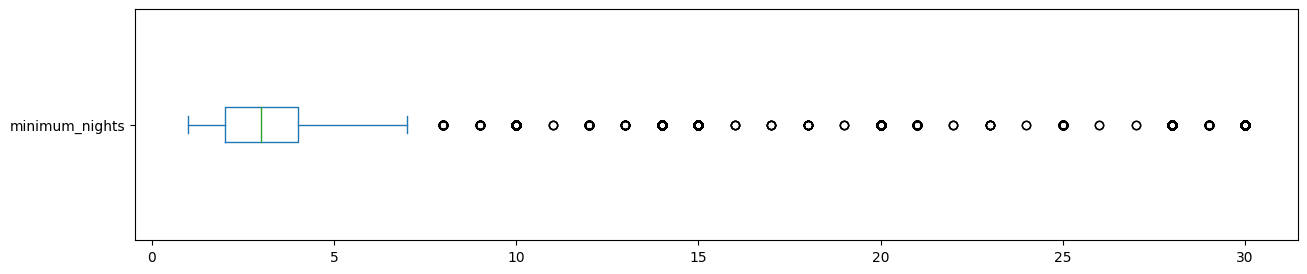

-> minimum_nights: valores acima de 30:
0 entradas
0.0000%


count    25803.000000
mean         4.287757
std          5.628110
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         30.000000
Name: minimum_nights, dtype: float64

In [17]:
# ver a média da coluna `minimum_nights``
display(dfNew.minimum_nights.describe())

#Plota gráfico box-plot
dfNew.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

#Remove outliers
dfNew.drop(dfNew[dfNew.minimum_nights > 30].index, axis=0, inplace=True)

# minimum_nights
dfNew.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("-> minimum_nights: valores acima de 30:")
print("{} entradas".format(len(dfNew[dfNew.minimum_nights > 30])))
print("{:.4f}%".format((len(dfNew[dfNew.minimum_nights > 30]) / dfNew.shape[0])*100))

# ver a nova média da coluna `minimum_nights``
display(dfNew.minimum_nights.describe())

#dfNew.minimum_nights.mean()
#dfNew.groupby(['neighbourhood']).minimum_nights.mean().sort_values(ascending=False)[:10]

## Conclusões


A análise dos dados do Airbnb foi realizada para a cidade de Buenos Aires.

* O dataset possui informações básicas sobre a locação de imóveis onde é extenso e possui alguns dados que indicam conter outliers;

* O dataset possui vários outliers nos dados relacionado a valor e numero minimo de locações que altera o resultado correto dos dados;

* As correlações entre as variáveis para determinar o preço de locação é bem fraca;

* Apesar de outliers a média e medianas dos dados de preço e número mínimo de dias esta muito próximo;

* O valor médio diário de uma locação é de ARS 17529 ou R$ 249,25; <sub>Convertido em 7 de set., 18:24 UTC</sub>

* O bairo mais caro para aluguel é Coghlan;

* A média de dias minímos para estadias é de 4 dias;

* Apartamentos/Casas completas representam quase 90% do imóveis disponíveis;

* Quartos compartilhados representam menos de 1% dos imóveis disponíveis para locação;


